In [2]:
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# y = var siniestralidad agregada
df = pd.DataFrame(index=range(2015,2025))
df['y'] = [36006381096,41809696036,37257792859,44400894693,48437970761,64407751577,64930012656,65923668228,61079580750,61034918717]
# x = primas imputadas
df['x'] = [53625600, 53446600, 54066500, 57145800, 60930800, 61222200, 68054700, 68886900, 73500500, 77490500] # Primas
df

,y,x
2015,36006381096,53625600
2016,41809696036,53446600
2017,37257792859,54066500
2018,44400894693,57145800
2019,48437970761,60930800
2020,64407751577,61222200
2021,64930012656,68054700
2022,65923668228,68886900
2023,61079580750,73500500
2024,61034918717,77490500


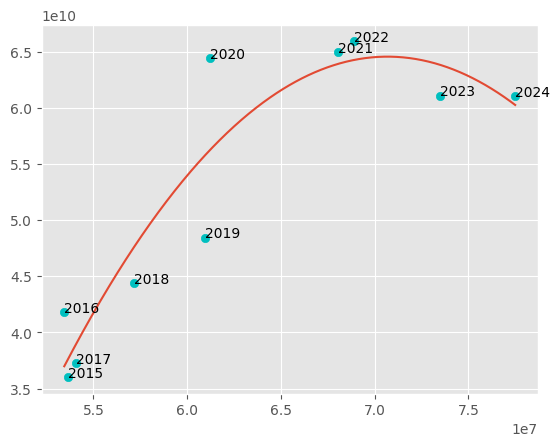

In [4]:
sinies = df['y'].to_list()
primas = df['x'].to_list()

plt.style.use('ggplot')
mymodel = np.poly1d(np.polyfit(primas, sinies, 2))
myline = np.linspace(min(df.x), max(df.x),500)
plt.scatter(primas, sinies, color='c')
plt.plot(myline, mymodel(myline))
for i, txt in enumerate(list(df.index)):
    plt.annotate(txt, (primas[i], sinies[i]))
plt.show()


In [5]:
#formula = 'y ~ x + I(x**2)'
formula = 'y ~ (x ** 2) + x'
result = ols(formula, df).fit()
print(result.params)
#Intercept, y = result.params
print('R^2: ', result.rsquared)
print(result.summary())

Intercept   -1.975756e+10
x            1.150380e+03
dtype: float64
R^2:  0.6806839547757573
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     17.05
Date:                Tue, 06 May 2025   Prob (F-statistic):            0.00330
Time:                        18:43:27   Log-Likelihood:                -240.14
No. Observations:                  10   AIC:                             484.3
Df Residuals:                       8   BIC:                             484.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

c:\Program Files\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
